In [1]:
#Build a codon usage table and use that table to create a DNA Sequence of a specified protein.

In [2]:
#Script 1 -> Take Stroud's data table and make it so it is manipulative.

In [3]:
#Script 2 -> Input gene list derived from script 1 and download the ORF sequence from SGD.
#Script 3 -> Input ORF, calculate Codon Usage

In [4]:
#Script 4 -> Input aggregate Codon Usage, output Codon table

In [5]:
#Function 5 -> Input amino acid sequence, output Random ORF based on Codon usage

In [8]:
#importing necessary packages for our code
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import dnachisel
from dnachisel import *
from scipy import stats
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from random import *
import numpy as np

In [9]:
#Downloading the table from our computer
table1 = pd.read_csv('table1.csv')
table2 = pd.read_csv('table2.csv')
table3 = pd.read_csv('table3.csv')
table4 = pd.read_csv('table4.csv')
table5 = pd.read_csv('table5.csv')

In [10]:
#appending our files into one table
table12 = table1.append(table2)
table123 = table12.append(table3)
table1234 = table123.append(table4)
all_tables = table1234.append(table5)

/Users/eddiefung/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [11]:
#Cleaning the Table
all_tables['#Cys'] = all_tables['#Cys'] / all_tables['#Amino acids'] *100
all_tables['#Met'] = all_tables['#Met'] / all_tables['#Amino acids'] *100
all_tables['#Trp'] = all_tables['#Trp'] / all_tables['#Amino acids'] *100
all_tables['#Tyr'] = all_tables['#Tyr'] / all_tables['#Amino acids'] *100
all_tables['Cys%'] = all_tables[['#Cys']].fillna(0)['#Cys'] + all_tables[['Cys%']].fillna(0)['Cys%']
all_tables['Met%'] = all_tables[['#Met']].fillna(0)['#Met'] + all_tables[['Met%']].fillna(0)['Met%']
all_tables['Trp%'] = all_tables[['#Trp']].fillna(0)['#Trp'] + all_tables[['Trp%']].fillna(0)['Trp%']
all_tables['Tyr%'] = all_tables[['#Tyr']].fillna(0)['#Tyr'] + all_tables[['Tyr%']].fillna(0)['Tyr%']
all_tables['%TMH'] = all_tables['#TMH'] / all_tables['#Amino acids']
all_tables = all_tables[all_tables['%TMH'] != 0]
clean_table = all_tables.drop(['#Cys', '#Met', '#Trp', '#Tyr','Signal peptide', 'Special Note', 'Gene length (bp)'], axis = 1)
clean_table['gene length (bp)'] = clean_table['#Amino acids'] * 3 + 3
clean_table[clean_table['Protein Name'] == 'YLL028W']
#This is the Host Codon Usage Table downloaded from SGD
host_codons = pd.read_csv('host_codon.txt', sep = " ", delimiter = '\t', header = None)
host_codons= host_codons.drop([2,3], axis = 1)
#Drop rows without expression
Has_expression = clean_table.dropna(subset = ['expression'])
#Replace expression values to numerical values
expression_num = Has_expression.replace(['–', '*', '**', '***', '****'], [0, 1, 2, 3, 4])
other_species = pd.read_csv('codon_high - codon_high.csv')
#Final Table name = expression_num
#host (yeast) codon usage = host_codons
#other species codon usage = other_species

In [12]:
expression_num

,#Amino acids,#TMH,Charge,Cys%,DScore,Extiction Coefficient,Met%,Molecular Weight (Da),PFAM_count,PI,Protein Name,SGD ID,Solubilization DDM,Trp%,Tyr%,expression,gene length (bp),%TMH
0,105,3,5.0,0.000000,0.230,1.25,4.800000,11250.1,75.0,9.64,YJ55,YJR085C,3,0.000000,10.500000,3,318,0.028571
1,108,3,-2.0,0.900000,0.182,1.79,1.900000,12404.4,26.0,4.88,YL014,YLL014W,2,2.800000,3.700000,2,327,0.027778
2,129,3,8.0,3.900000,0.085,1.86,2.300000,14689.3,273.0,9.43,YLR171W,YLR171W,0,2.300000,6.200000,0,390,0.023256
3,130,3,8.0,3.800000,0.112,0.17,1.500000,14697.5,79.0,9.74,OST2,YOR103C,1,0.000000,1.500000,1,393,0.023077
4,140,4,-0.5,2.900000,0.583,0.77,4.300000,15663.5,68.0,6.33,VPS55,YJR044C,3,0.700000,3.600000,3,423,0.028571
5,143,3,-5.5,0.700000,0.396,0.64,2.100000,15881.5,24.0,4.13,TVP15,YDR100W,1,0.000000,5.600000,1,432,0.020979
8,173,4,8.5,2.900000,0.625,0.64,2.300000,18967.0,106.0,9.62,NCE2,YPR149W,0,0.600000,2.900000,1,522,0.023121
10,181,4,21.0,1.100000,0.219,1.44,3.300000,20741.4,49.0,10.80,YL065,YLR065C,0,1.700000,5.500000,0,546,0.022099
11,184,4,-2.0,1.600000,0.249,1.64,1.600000,20101.2,52.0,5.06,VPS68,YOL129W,3,2.200000,4.300000,3,555,0.021739
12,199,3,5.0,2.000000,0.209,2.46,2.000000,23147.8,60.0,8.86,TVP23,YDR084C,2,4.000000,4.500000,2,600,0.015075


In [13]:
#gets reference amino acid sequence using SGD API

def get_protein_sequence(locus_id):
    BASE_URL = 'http://yeastgenome.org'
    LOCUS_BASE_URL = BASE_URL + '/webservice/locus/'
    seq_details_url = LOCUS_BASE_URL + locus_id + '/sequence_details'
    response = requests.get(seq_details_url)
    json_data = response.json()
    lst = pd.DataFrame.from_dict(json_data, orient='index').T['protein'].dropna()
    reference = [i for i in lst if i.get('strain').get('status') == 'Reference']
    return reference[0]

In [14]:
def get_protein_list(table = expression_num, tmh = (0, .03) , expression = [], amino_acid_range = (0,2000)):
    #Will extract a dataframe with proteins from a larger dataframe of proteins based on tmh range, expression values, and amino acid range
    df = pd.DataFrame()
    if expression:
        for i in expression:
            df = df.append(table[table['expression'] == i])
    df = df[(df['#Amino acids'] > amino_acid_range[0]) & (df['#Amino acids'] < amino_acid_range[1])]
    df = df[(df['%TMH'] > tmh[0]) & (df['%TMH'] < tmh[1])]
    return df

def get_reference(locus_id):
    #download reference open reading frame using SGD API
    BASE_URL = 'http://yeastgenome.org'
    LOCUS_BASE_URL = BASE_URL + '/webservice/locus/'
    seq_details_url = LOCUS_BASE_URL + locus_id + '/sequence_details'
    response = requests.get(seq_details_url)
    json_data = response.json()
    lst = pd.DataFrame.from_dict(json_data, orient='index').T['coding_dna'].dropna()
    reference = [i for i in lst if i.get('strain').get('status') == 'Reference']
    return reference[0]

def codon_counts(sequence):
    # returns dictionary indicating codons frequencies and positions
    codons_counts = dnachisel.biotools.biotools.codons_frequencies(sequence)
    return codons_counts

def all_counts(lst_of_dictionaries):
    #Combines a list of dictionary of codon frequencies into one giant dictionary
    starting_d = {}
    for dic in lst_of_dictionaries:
        if not starting_d:
            for key, value in dic.items():
                starting_d[key] = {}
                for akey, avalue in value.items():
                    starting_d[key][akey] = avalue
        else:
            for key, value in dic.items():
                curr_d = starting_d.get(key)
                for akey, avalue in value.items():
                    starting_d[key][akey] = avalue + curr_d.get(akey)
    return starting_d

def codon_frequencies(dictionary):
    #Gets the total frequencies from the dictionary
    copy = {}
    for key, value in dictionary.items():
        copy[key] = {}
        for akey, avalue in value.items():
            copy[key][akey] = avalue
    for aa, data in copy.items():
        curr_d = copy[aa]
        for codon, counts in curr_d.items():
            if  codon != 'total':
                copy[aa][codon] =  curr_d[codon] / curr_d['total']
    return copy

def get_codon_table(codons_frequencies):
    #Converts the frequencies dictionary into a dataframe
    codon_table = pd.DataFrame.from_dict({(i,j): codons_frequencies[i][j] 
                           for i in codons_frequencies.keys() 
                           for j in codons_frequencies[i].keys()},
                       orient='index')
    codon_table[['Amino Acid', 'Codon']] = pd.DataFrame(codon_table.index.tolist(), index=codon_table.index)
    codon_table[['Amino Acid', 'Codon', 'Observed Frequency']] = codon_table[['Amino Acid', 'Codon', 0]]
    upd = codon_table.drop(0, axis = 1).rename({'*': 'End'})
    return upd

def codon_table_pipeline(host = host_codons, table_in = expression_num, tmh_in =  (0, .03), expression_in = None, amino_acid_range_in = (0,2000), proteinid_list = None, s_size = None):
    #Utilizes the above features to get codon usage table
    #I recommend assigning this function call to a name so that you don't have to run it multiple times
    if not proteinid_list:
        proteinid_list = get_protein_list(table = table_in, tmh = tmh_in , expression = expression_in, amino_acid_range = amino_acid_range_in)['SGD ID'].tolist()
        if s_size:
            proteinid_list = choices(proteinid_list, k = s_size)
    dictionary_list = []
    for sgdid in proteinid_list:
        sequence = get_reference(sgdid).get('residues')
        dictionary = codon_counts(sequence)
        dictionary_list.append(dictionary)
    dictionary_counts = all_counts(dictionary_list)
    frequencies = codon_frequencies(dictionary_counts)
    codon_table = get_codon_table(frequencies)
    merge_table = codon_table.merge(host_codons, how='left', left_on = 'Codon', right_on = 1, left_index = True).drop([0,1], axis = 1).rename({4: 'Host Frequency'}, axis = 1).reset_index().drop('index', axis = 1)
    merge_table['Host Frequency - Observed Frequency'] = merge_table['Host Frequency'] - merge_table['Observed Frequency']
    merge_table['Human Frequency'] = other_species['Human Frequency']
    merge_table['Drosophila Frequency'] = other_species['Drosophila Frequency']
    merge_table['C. Elegans'] = other_species['C. Elegans']
    return merge_table

In [15]:
def bootstrap_kstest_v2(repetitions, protein_list, sample_size = None):
    #bootstrap kstest of 66 proteins of large dataset and compare with large expressing proteins
    #returns lists of p values and KS statistics
    #Takes a long time to run
    #Statistic considered is the absolute sum of differences
    #I recommend assigning this function call to a name so that you don't have to run it multiple times
    sample_codon_table = codon_table_pipeline(expression_in = [3,4], s_size = sample_size)
    p_values = []
    KS_statistics = []
    if not sample_size:
        sample_size = len(sample_codon_table)
    for i in range(repetitions):
        bootstrap_protein_list = sample(protein_list, sample_size)
        try: 
            bootstrap_codon_table = codon_table_pipeline(proteinid_list = bootstrap_protein_list)
        except:
            print('error!')
        else:
            KS, p_value = stats.ks_2samp(sample_codon_table.dropna().groupby('Amino Acid').agg(lambda x: sum(abs(x))).drop(labels = '*', axis = 'index')['Host Frequency - Observed Frequency'], 
                                     bootstrap_codon_table.dropna().groupby('Amino Acid').agg(lambda x: sum(abs(x))).drop(labels = '*', axis = 'index')['Host Frequency - Observed Frequency'])
            print(KS, p_value)
            p_values.append(p_value)
            KS_statistics.append(KS)
    return p_values, KS_statistics

def significant_p_values(p_values, cut_off):
    sig_count = 0
    for i in p_values:
        if i < cut_off:
            sig_count += 1
    num = sig_count / len(p_values)
    print(num)
    plt.hist(p_values, bins = 15)
    

In [16]:
minimum = min(get_protein_list(expression = [3,4])['#Amino acids'])
maximum = max(get_protein_list(expression = [3,4])['#Amino acids'])
yeast_proteins = pd.read_csv('yeast.txt', delim_whitespace = True, header = None)
yeast_proteins = yeast_proteins.drop([1,2,5], axis = 1)
yeast_proteins.columns = ['Ordered locus name (OLN)', 'SGD ascension number', 'Length of the sequence']
interested_proteins = yeast_proteins[(yeast_proteins['Length of the sequence'] > minimum) & ((yeast_proteins['Length of the sequence'] < maximum))]

In [11]:
#p_big_host, ks_big_host = bootstrap_kstest_v2(300, interested_proteins['Ordered locus name (OLN)'].to_list(), 100)

In [12]:
p_big_host, ks_big_host = bootstrap_kstest_v2(100, interested_proteins['Ordered locus name (OLN)'].to_list())

0.4 0.059142334165034526
0.45000000000000007 0.023213275854449555
0.6 0.0007252860301701252
0.44999999999999996 0.023213275854449617
0.3999999999999999 0.05914233416503466
0.4 0.059142334165034526
0.5499999999999999 0.002570614309514983
0.4 0.059142334165034526
0.4 0.059142334165034526
0.5 0.008161678659143069
0.3999999999999999 0.05914233416503466
0.44999999999999996 0.023213275854449617
0.5499999999999999 0.002570614309514983
0.35 0.13494714803612698
0.5499999999999999 0.002570614309514983
0.45 0.023213275854449576
0.5 0.008161678659143069
0.5499999999999999 0.002570614309514983
0.25 0.49734233531361083
0.5 0.008161678659143069
0.55 0.0025706143095149737
0.4 0.059142334165034526
0.5 0.008161678659143069
0.55 0.0025706143095149737
0.35000000000000003 0.13494714803612687
0.4 0.059142334165034526
0.5499999999999999 0.002570614309514983
0.45 0.023213275854449576
0.45 0.023213275854449576
0.5 0.008161678659143069
0.4 0.059142334165034526
0.5 0.008161678659143069
0.6 0.0007252860301701252


In [83]:
p_bs, ks_bs = bootstrap_kstest_v2(100, codon_table_pipeline(expression_in = [1, 2])['SGD ID'].to_list())

ConnectionError: ('Connection aborted.', OSError("(50, 'ENETDOWN')"))

Proportion of p values less than 0.01:


0.5555555555555556

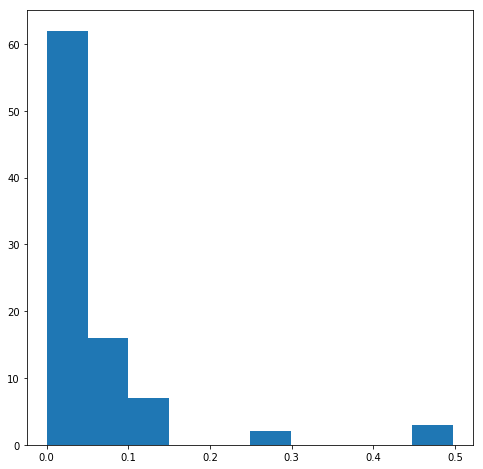

In [74]:
plt.figure(figsize = (8,8))
plt.hist(p_big_host)
cutoff = .01
p = 0
total = 0
for i in p_big_host:
    total += 1
    if i < cutoff:
        p += 1
print(('Proportion of p values less than ' + str(cutoff) + ':') )
p/total
        



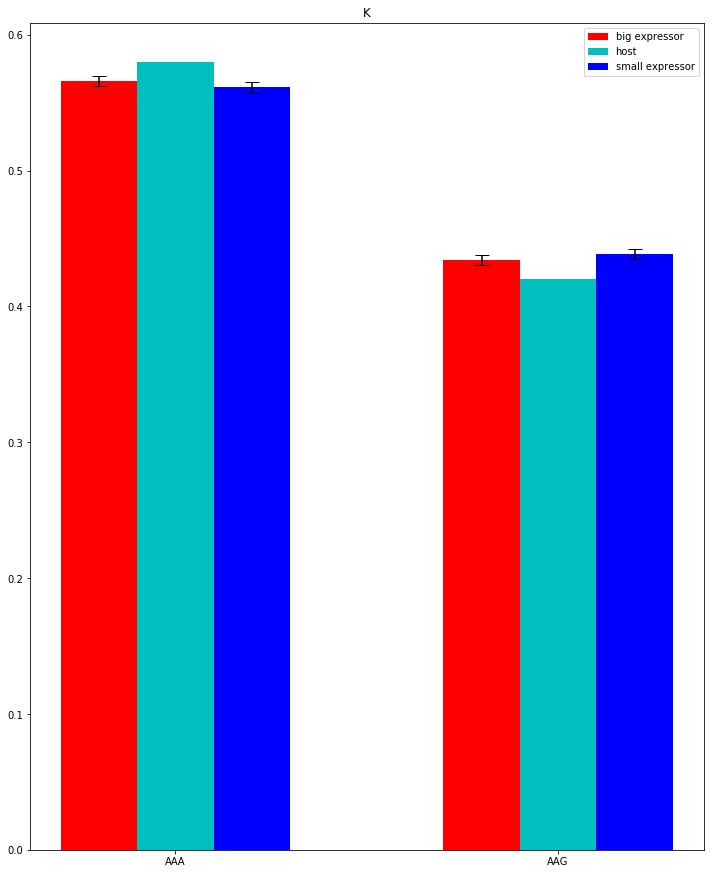

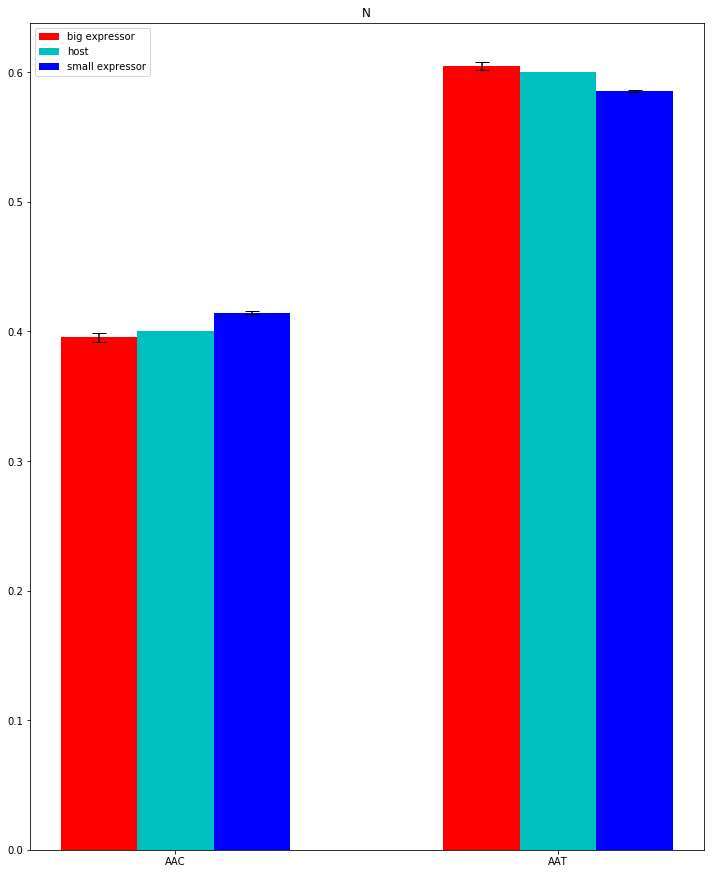

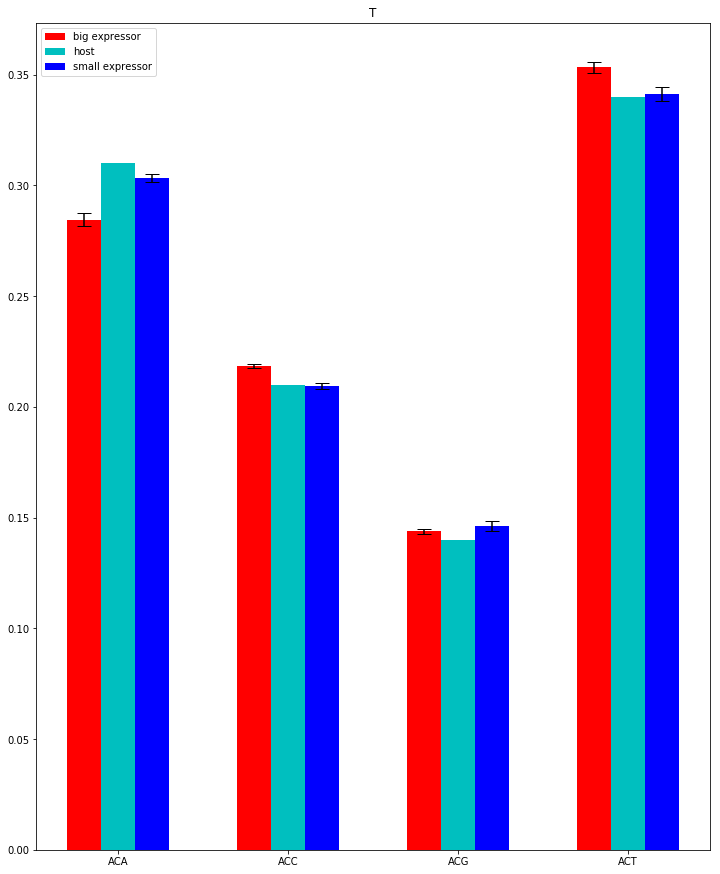

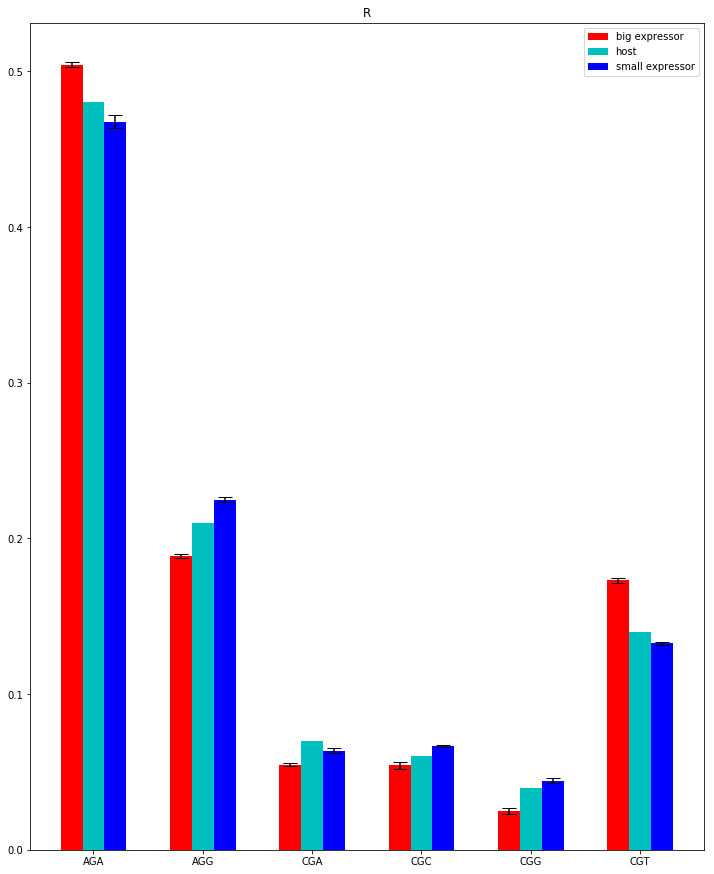

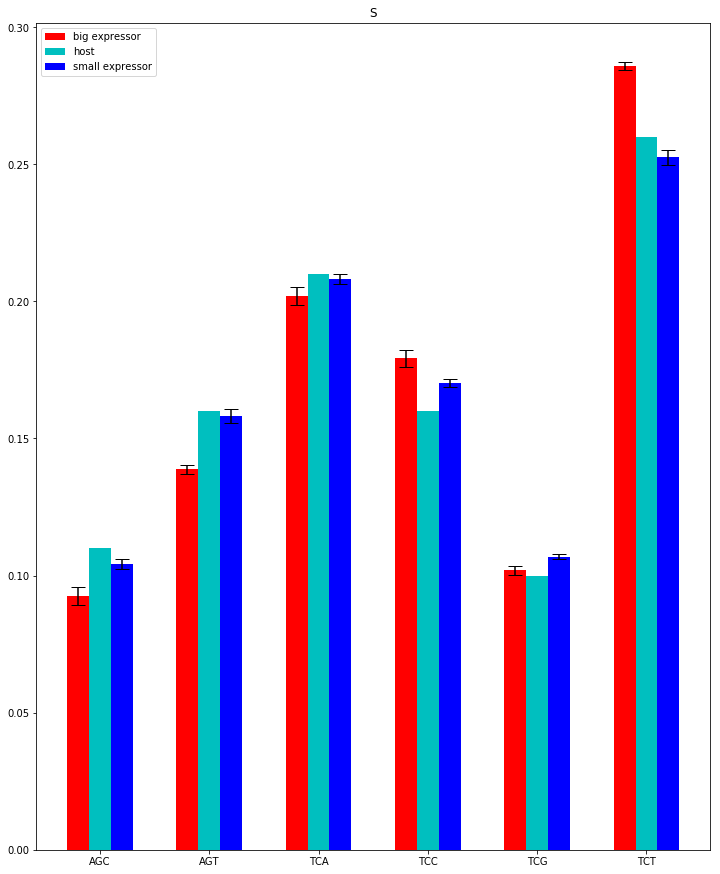

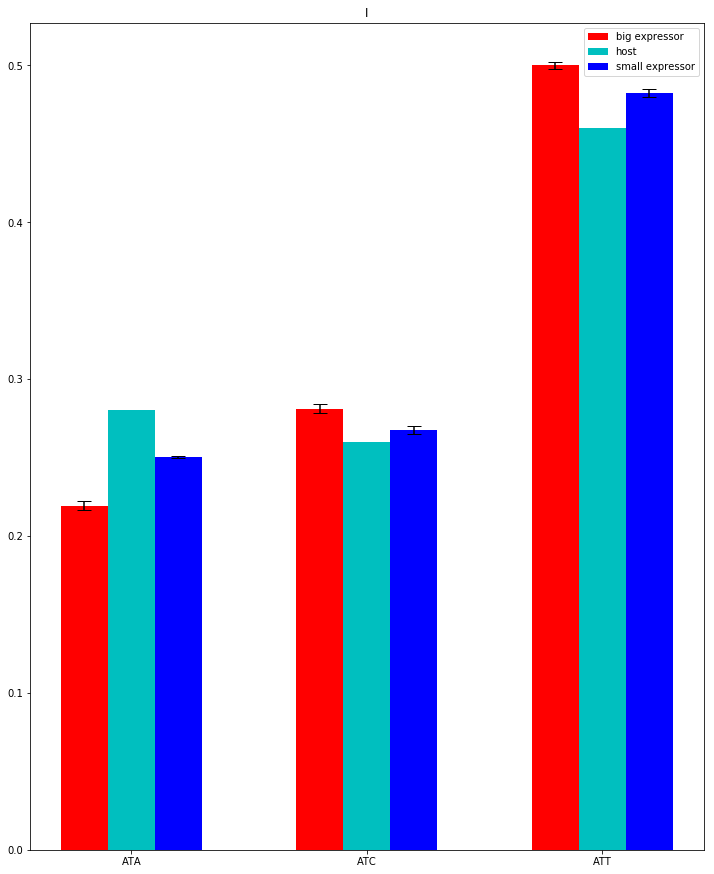

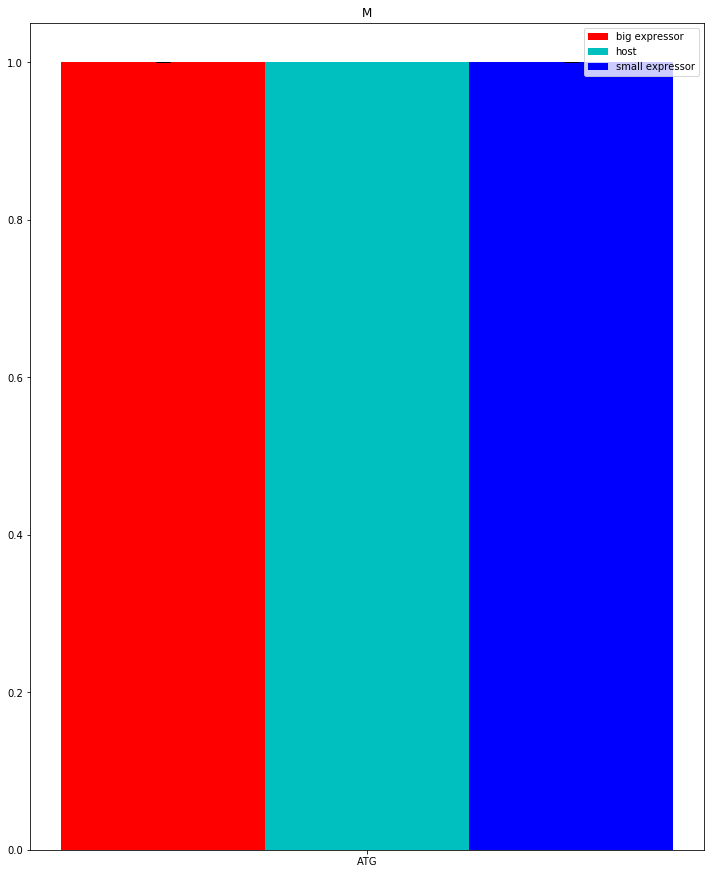

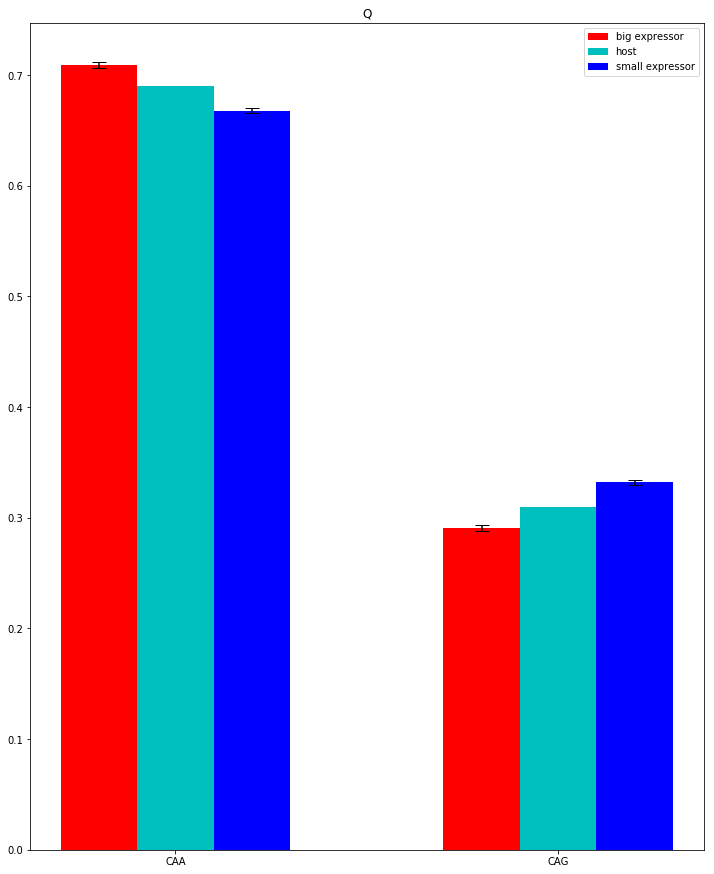

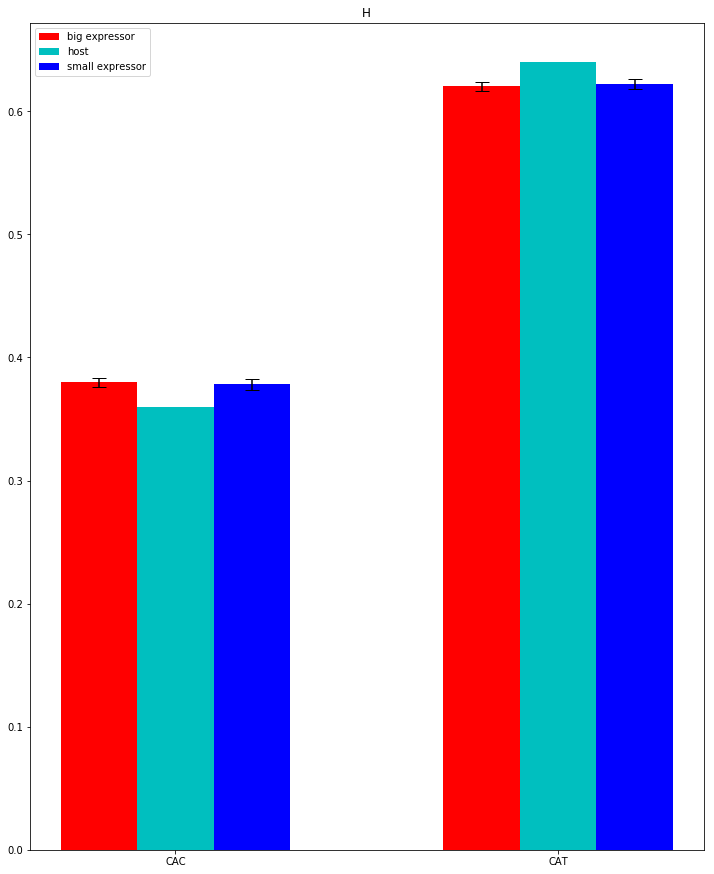

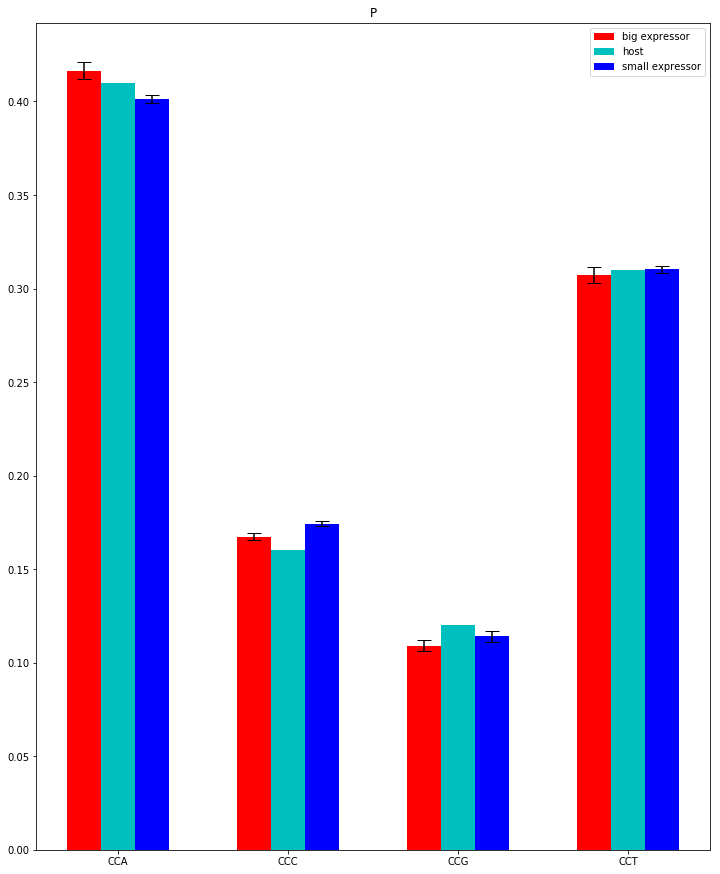

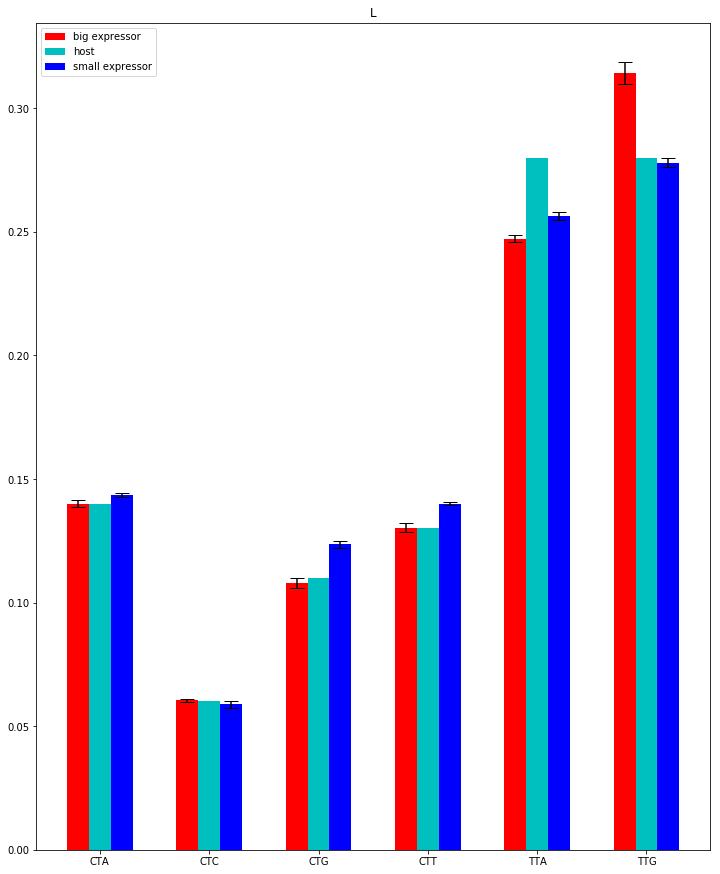

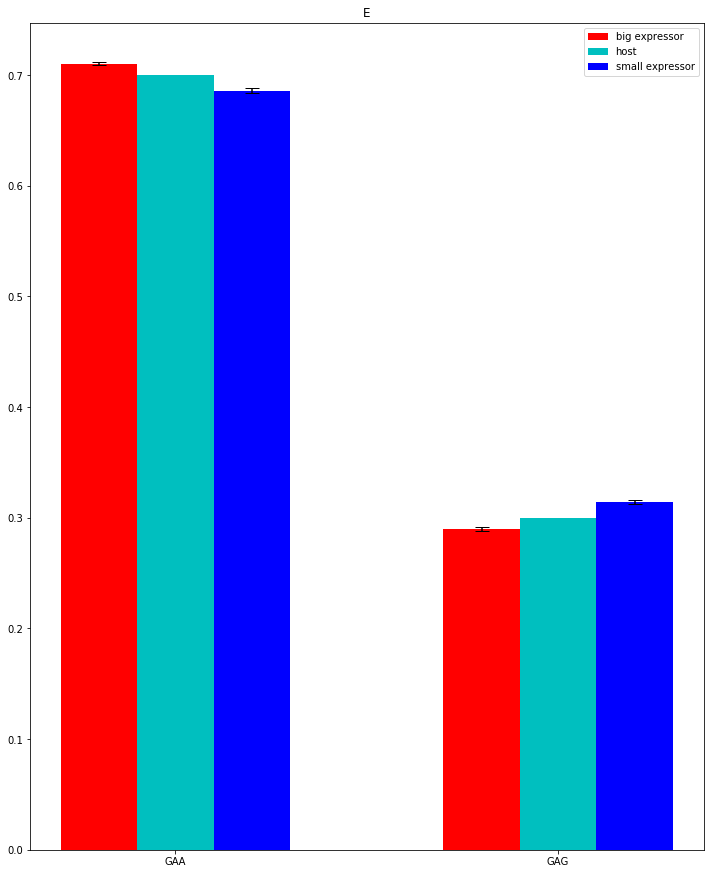

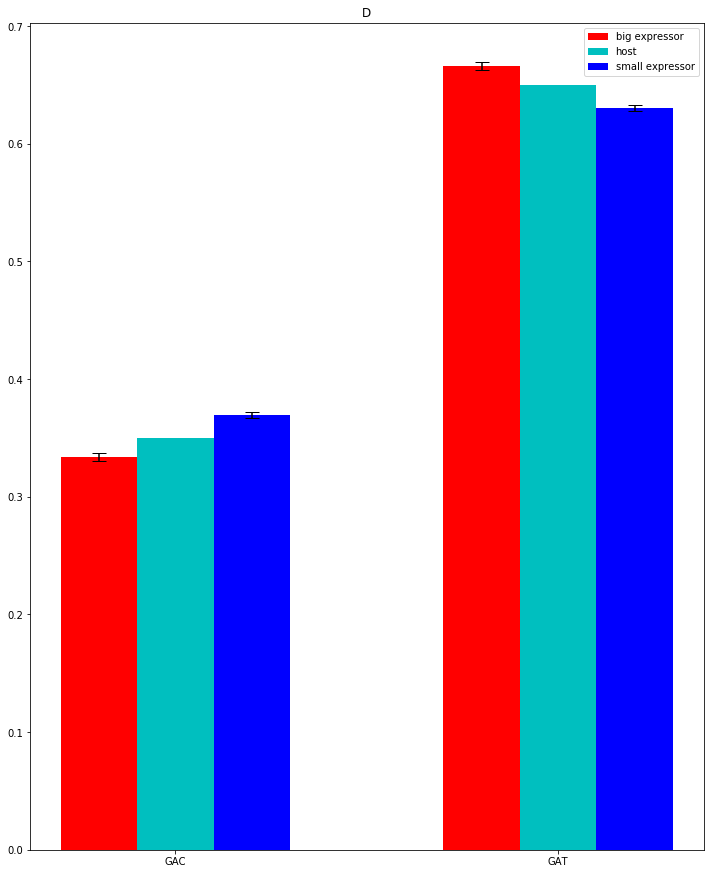

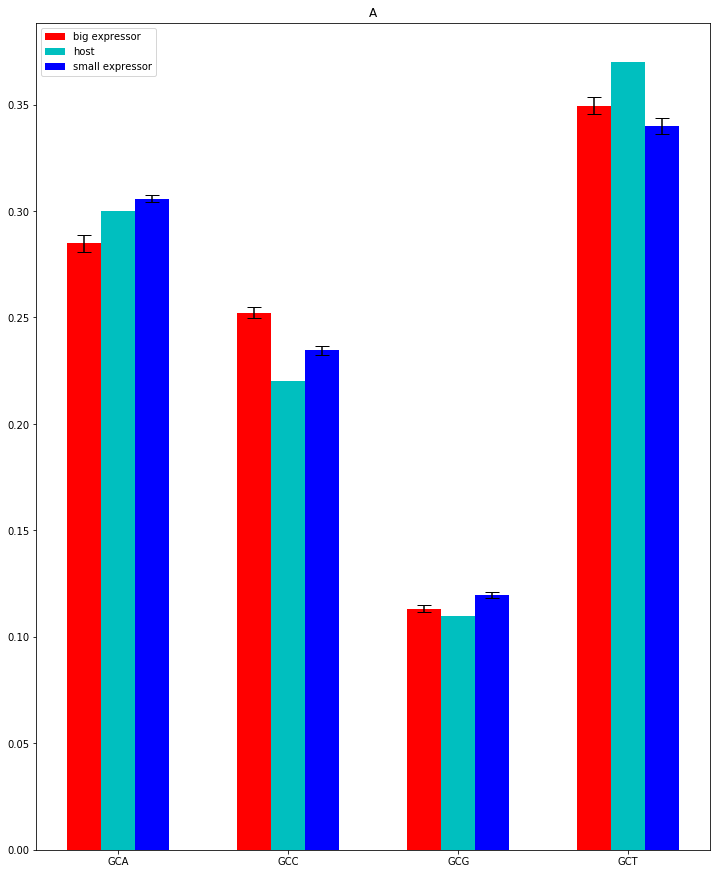

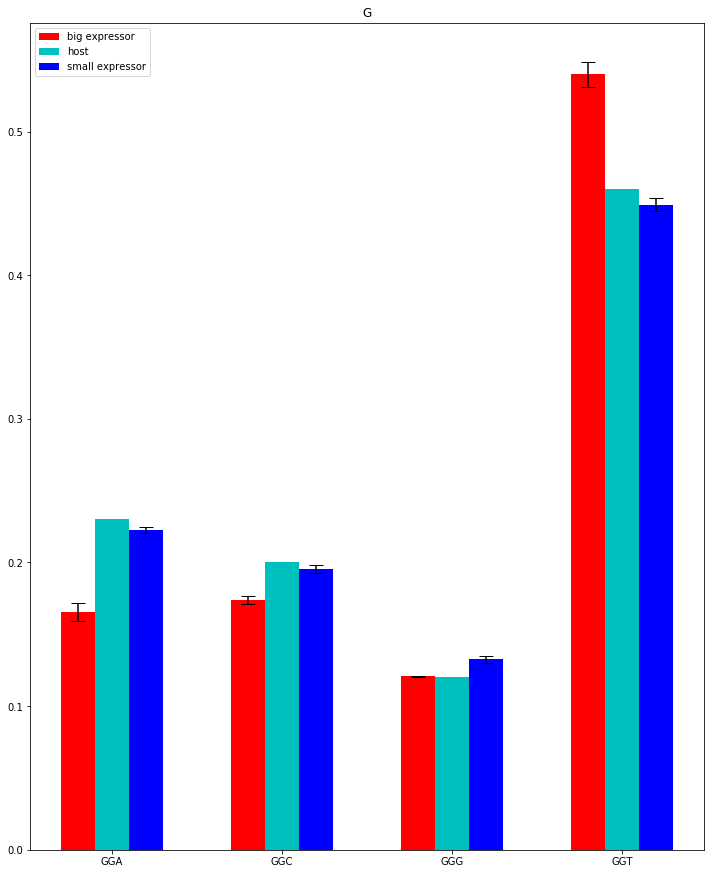

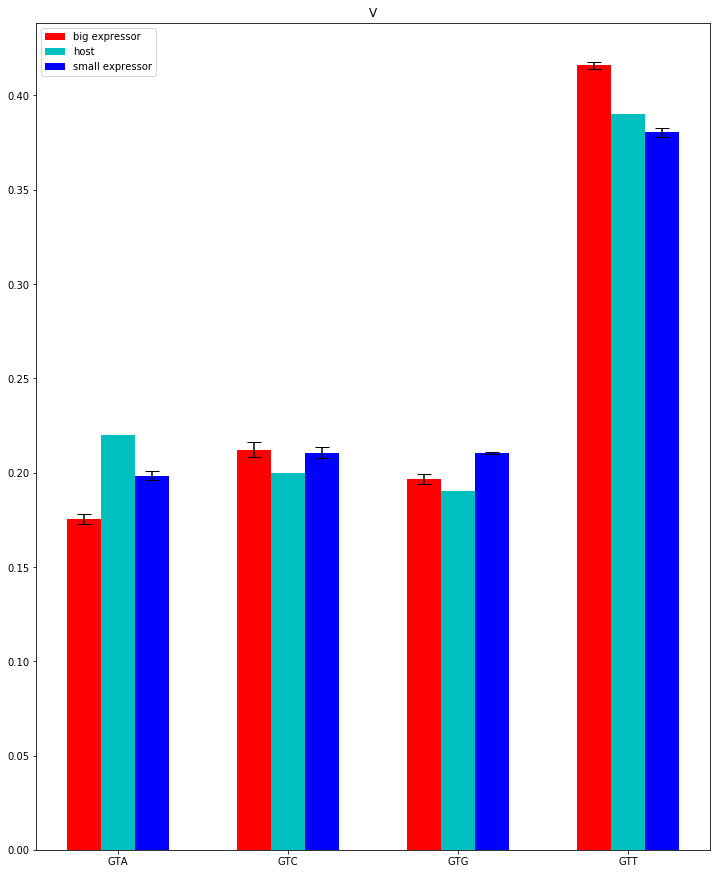

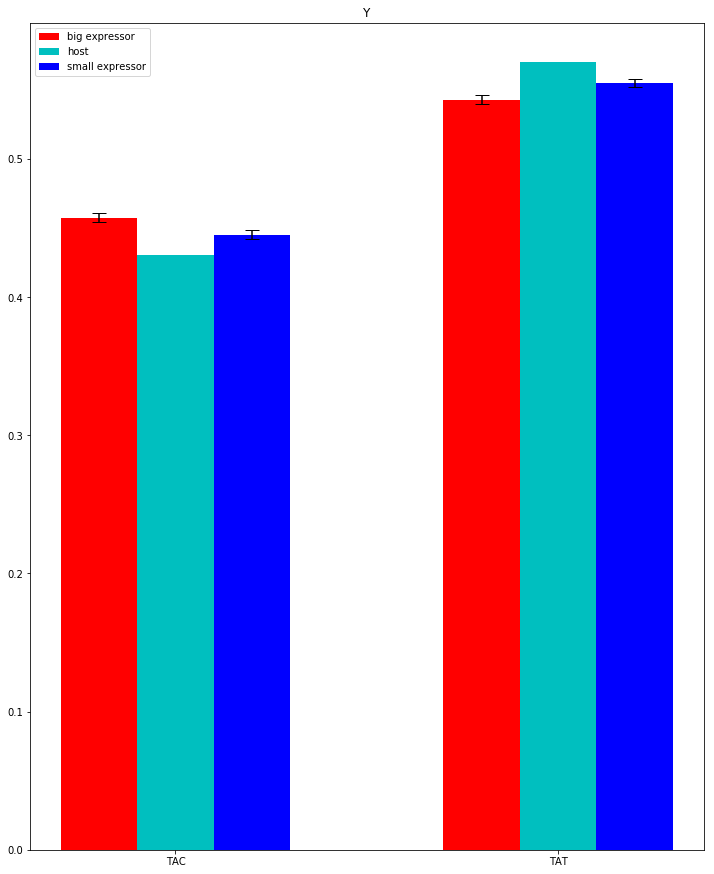

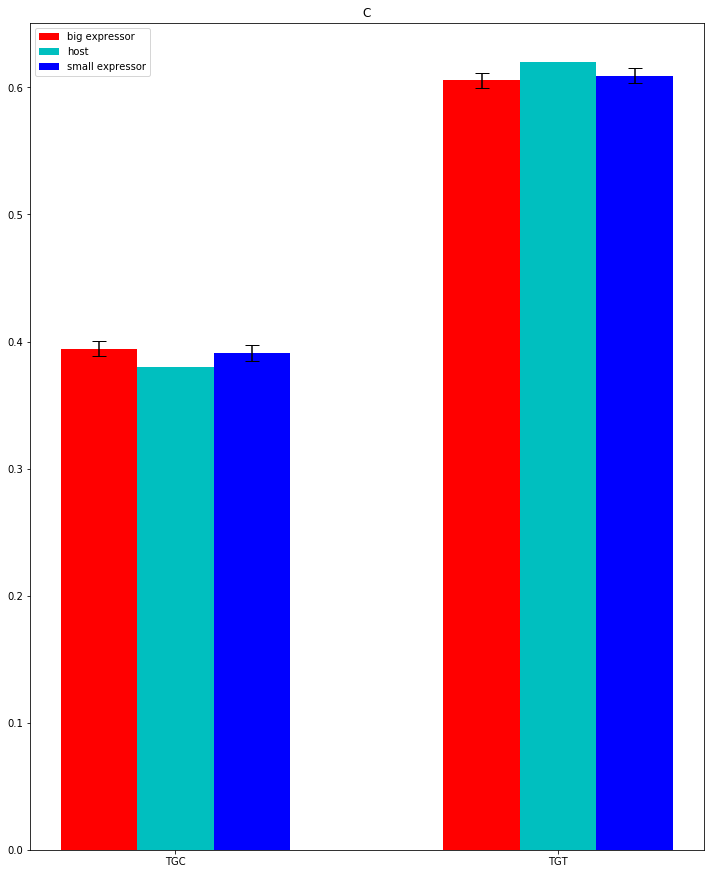

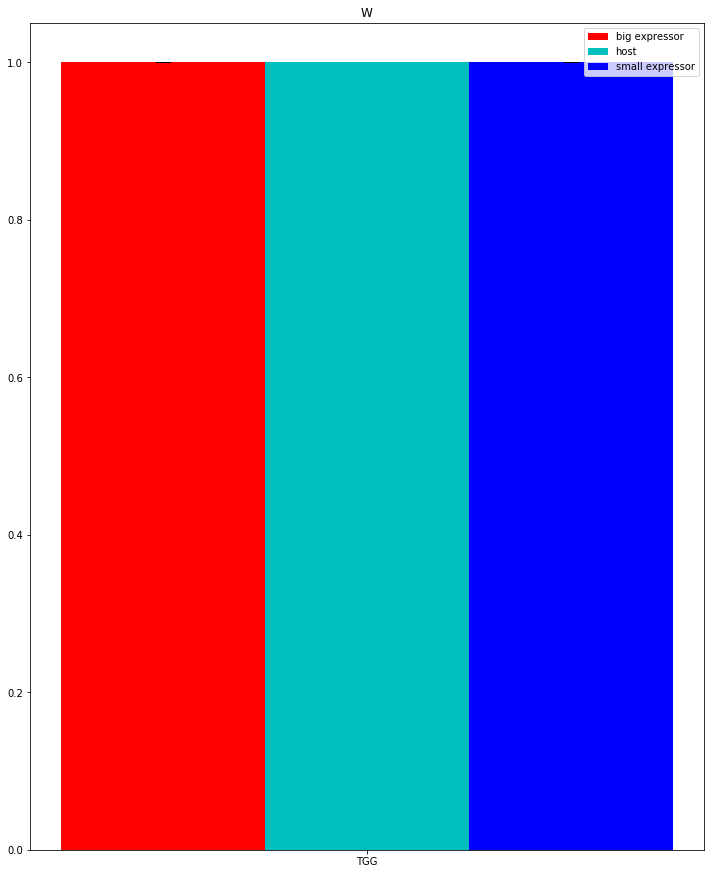

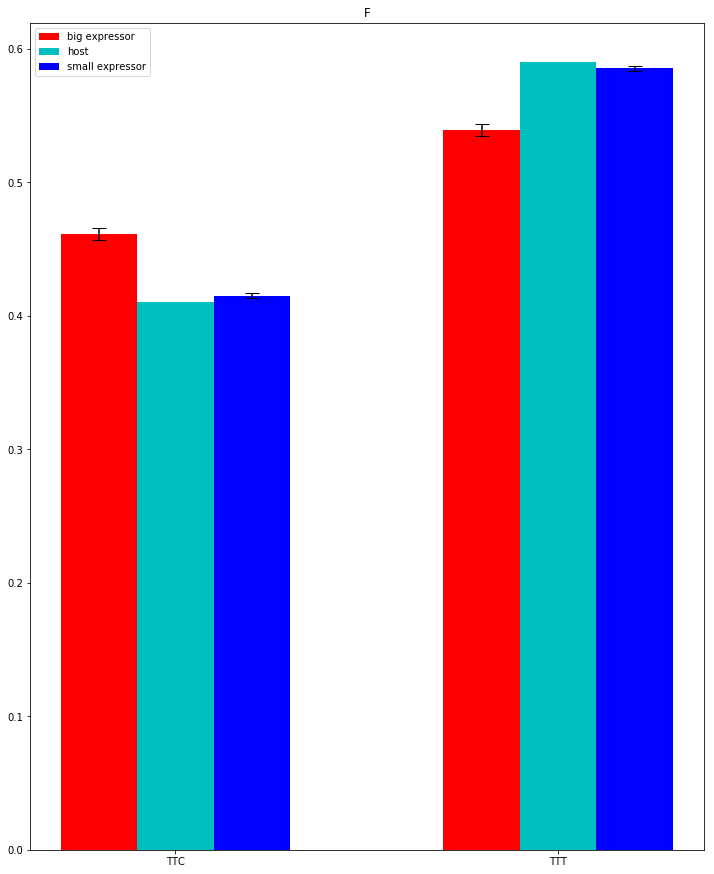

In [59]:
error_dic = {}
n = 10
for AA in np.delete(codons_table_big['Amino Acid'].unique(), 16):
    error_dic[AA] = {}
    table = codons_table_big[(codons_table_big['Amino Acid'] == AA) & (codons_table_big['Codon'] != 'total')]
    for codon in table['Codon'].to_list():
        error_dic[AA][codon] = {}
        for condition in ['small', 'big']:
            error_dic[AA][codon][condition] = np.array([])
for i in range(5):
    big_table = codon_table_pipeline(expression_in = [3, 4], s_size = 85)
    small_table = codon_table_pipeline(proteinid_list = get_protein_list(expression = [1,2]).sample(85)['SGD ID'].to_list())
    for AA in np.delete(big_table['Amino Acid'].unique(), 16):
        table = big_table[(big_table['Amino Acid'] == AA) & (big_table['Codon'] != 'total')]
        other_table = small_table[(small_table['Amino Acid'] == AA) & (small_table['Codon'] != 'total')]
        codons = table['Codon']
        for codon in codons.to_list():
            small_freq = other_table[other_table['Codon'] == codon]['Observed Frequency']
            error_dic[AA][codon]['small'] = np.append(error_dic[AA][codon]['small'], small_freq)
            observed_F = table[table['Codon'] == codon]['Observed Frequency']
            error_dic[AA][codon]['big'] = np.append(error_dic[AA][codon]['big'], observed_F)
            
new_error_dic = {}
for AA, codons in error_dic.items():
    new_error_dic[AA] = {}
    new_error_dic[AA]['big std'] = np.array([])
    new_error_dic[AA]['small std'] = np.array([])
    new_error_dic[AA]['big mean'] = np.array([])
    new_error_dic[AA]['small mean'] = np.array([])
    for codon, conditions in error_dic[AA].items():
        new_error_dic[AA][codon] = {}
        for condition, lst in error_dic[AA][codon].items():
            new_error_dic[AA][codon][condition] = {}
            array = np.array(lst)
            new_error_dic[AA][codon][condition]['std'] = np.std(array) / (n ** 0.5)
            new_error_dic[AA][codon][condition]['mean'] = np.mean(array) 
        new_error_dic[AA]['big std'] = np.append(new_error_dic[AA]['big std'], new_error_dic[AA][codon]['big']['std'])
        new_error_dic[AA]['small std'] = np.append(new_error_dic[AA]['small std'], new_error_dic[AA][codon]['small']['std'])
        new_error_dic[AA]['big mean'] = np.append(new_error_dic[AA]['big mean'], new_error_dic[AA][codon]['big']['mean'])
        new_error_dic[AA]['small mean'] = np.append(new_error_dic[AA]['small mean'], new_error_dic[AA][codon]['small']['mean'])

        
total = 1
for AA in np.delete(codons_table_big['Amino Acid'].unique(), 16):
    table = codons_table_big[(codons_table_big['Amino Acid'] == AA) & (codons_table_big['Codon'] != 'total')]
    codons = table['Codon']
    Host_F = table['Host Frequency']
    r1 = np.arange(len(codons))
    plt.figure(figsize = (70, 70))
    ax = plt.subplot(4,5,total)
    plt.title(AA)
    ax.bar(r1-0.2, new_error_dic[AA]['big mean'], yerr = new_error_dic[AA]['big std'], width=0.2, color='r', align='center', label = 'big expressor', capsize = 7)
    ax.bar(r1, Host_F, width=0.2, color='c', align='center', label = 'host')
    ax.bar(r1+0.2, new_error_dic[AA]['small mean'], yerr = new_error_dic[AA]['small std'], width = 0.2, color = 'b', align = 'center', label = 'small expressor', capsize = 7)
    plt.legend()
    plt.xticks(ticks = np.arange(len(codons)) ,labels = codons.to_list())
    total += 1

In [58]:
new_error_dic

{'K': {'big std': array([0.01123881, 0.01123881]),
  'small std': array([0.01073644, 0.01073644]),
  'big mean': array([0.56688697, 0.43311303]),
  'small mean': array([0.55811137, 0.44188863]),
  'AAA': {'small': {'std': 0.010736437114096078, 'mean': 0.5581113696570787},
   'big': {'std': 0.011238809886724708, 'mean': 0.5668869732632407}},
  'AAG': {'small': {'std': 0.010736437114096078, 'mean': 0.4418886303429215},
   'big': {'std': 0.011238809886724715, 'mean': 0.4331130267367594}}},
 'N': {'big std': array([0.00933508, 0.00933508]),
  'small std': array([0.0071181, 0.0071181]),
  'big mean': array([0.39201233, 0.60798767]),
  'small mean': array([0.41374076, 0.58625924]),
  'AAC': {'small': {'std': 0.007118100489139841, 'mean': 0.413740764747177},
   'big': {'std': 0.009335081584177493, 'mean': 0.39201232613951636}},
  'AAT': {'small': {'std': 0.007118100489139858, 'mean': 0.586259235252823},
   'big': {'std': 0.009335081584177521, 'mean': 0.6079876738604837}}},
 'T': {'big std': a

In [42]:
for codon, conditions in error_dic[AA].items():
        for condition, lst in error_dic[AA][codon].items():

dict_items([('TAC', {'small': array([0.45266106, 0.4201726 ]), 'big': array([0.46004843, 0.46004843])}), ('TAT', {'small': array([0.54733894, 0.5798274 ]), 'big': array([0.53995157, 0.53995157])})])

array([0., 1.])

In [29]:
np.delete(codons_table_big['Amino Acid'].unique(), 16)

array(['K', 'N', 'T', 'R', 'S', 'I', 'M', 'Q', 'H', 'P', 'L', 'E', 'D',
       'A', 'G', 'V', 'Y', 'C', 'W', 'F'], dtype=object)

In [16]:
#p_values, KS_statistics = bootstrap_kstest_v2(100)

In [17]:
#p_values_1000, KS_statistics_1000 = bootstrap_kstest_v2(1000)

In [19]:
codons_table_big = codon_table_pipeline(expression_in = [3, 4])

In [86]:
len(codons_table_big)

85

In [18]:
codons_table_big['Human Frequency'] = other_species['Human Frequency']
codons_table_big['Drosophila Frequency'] = other_species['Drosophila Frequency']
codons_table_big['C. Elegans'] = other_species['C. Elegans']
codons_table_big['Host Frequency - Human Frequency'] = codons_table_big['Host Frequency'] - codons_table_big['Human Frequency']
codons_table_big['Host Frequency - Drosophila Frequency'] = codons_table_big['Host Frequency'] - codons_table_big['Drosophila Frequency']
codons_table_big['Host Frequency - C. Elegans'] = codons_table_big['Host Frequency']- codons_table_big['C. Elegans']
codons_table_big['% Change'] = codons_table_big['Host Frequency - Observed Frequency'] / codons_table_big['Host Frequency']
codons_table_big.sort_values('% Change', ascending = False)

NameError: name 'codons_table_big' is not defined

In [20]:
codons_table_small, frequencies_small = codon_table_pipeline(expression_in = [1, 2])

In [21]:
codons_table_small['Human Frequency'] = other_species['Human Frequency']
codons_table_small['Drosophila Frequency'] = other_species['Drosophila Frequency']
codons_table_small['C. Elegans'] = other_species['C. Elegans']
codons_table_small['Host Frequency - Human Frequency'] = codons_table_small['Host Frequency'] - codons_table_small['Human Frequency']
codons_table_small['Host Frequency - Drosophila Frequency'] = codons_table_small['Host Frequency'] - codons_table_small['Drosophila Frequency']
codons_table_small['Host Frequency - C. Elegans'] = codons_table_small['Host Frequency']- codons_table_small['C. Elegans']
codons_table_small

,Amino Acid,Codon,Observed Frequency,Host Frequency,Host Frequency - Observed Frequency,Human Frequency,Drosophila Frequency,C. Elegans,Host Frequency - Human Frequency,Host Frequency - Drosophila Frequency,Host Frequency - C. Elegans
0,K,total,7030.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,K,AAA,0.566999,0.58,0.013001,0.43,0.30,0.59,0.15,0.28,-0.01
2,K,AAG,0.433001,0.42,-0.013001,0.57,0.70,0.41,-0.15,-0.28,0.01
3,N,total,6534.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N,AAC,0.410774,0.40,-0.010774,0.53,0.56,0.38,-0.13,-0.16,0.02
5,N,AAT,0.589226,0.60,0.010774,0.47,0.44,0.62,0.13,0.16,-0.02
6,T,total,7755.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,T,ACA,0.305609,0.31,0.004391,0.28,0.20,0.34,0.03,0.11,-0.03
8,T,ACC,0.208382,0.21,0.001618,0.36,0.38,0.18,-0.15,-0.17,0.03
9,T,ACG,0.141973,0.14,-0.001973,0.11,0.26,0.15,0.03,-0.12,-0.01


In [45]:
codons_small_sample = codon_table_pipeline(proteinid_list = get_protein_list(expression = [1,2]).sample(60)['SGD ID'].to_list())
codons_small_sample_df = codons_small_sample

In [23]:
big_changes = codons_table_big[(codons_table_big['Host Frequency - Observed Frequency'] < -.04) | (codons_table_big['Host Frequency - Observed Frequency'] > .04)]
big_changes_2 = codons_table_small[(codons_table_small['Host Frequency - Observed Frequency'] < -.04) | (codons_table_small['Host Frequency - Observed Frequency'] > .04)]
total_changes = codons_table_big.dropna().groupby('Amino Acid').agg(lambda x: sum(abs(x))).drop(labels = '*', axis = 'index')
total_changes_2 = codons_table_small.dropna().groupby('Amino Acid').agg(lambda x: sum(abs(x))).drop(labels = '*', axis = 'index')

In [24]:
total_changes_2.sort_values('Host Frequency - Observed Frequency', ascending = False)

,Observed Frequency,Host Frequency,Host Frequency - Observed Frequency,Human Frequency,Drosophila Frequency,C. Elegans,Host Frequency - Human Frequency,Host Frequency - Drosophila Frequency,Host Frequency - C. Elegans
Amino Acid,,,,,,,,,
R,1.0,1.00,0.059261,0.99,0.99,1.00,0.65,0.97,0.64
I,1.0,1.00,0.052831,1.00,1.00,1.00,0.42,0.42,0.24
A,1.0,1.00,0.052782,1.01,1.00,1.00,0.35,0.62,0.06
V,1.0,1.00,0.052713,1.00,1.01,1.00,0.62,0.63,0.12
L,1.0,1.00,0.047643,1.01,1.00,0.99,0.85,0.82,0.53
Q,1.0,1.00,0.040064,1.00,1.00,1.00,0.84,0.78,0.06
G,1.0,1.01,0.034932,1.00,1.00,0.99,0.59,0.59,0.74
D,1.0,1.00,0.032797,1.00,1.00,1.00,0.38,0.24,0.06
S,1.0,1.00,0.031758,1.00,1.00,1.00,0.38,0.64,0.20


In [25]:
total_changes.sort_values('Host Frequency - Observed Frequency', ascending = False)

,Observed Frequency,Host Frequency,Host Frequency - Observed Frequency,Human Frequency,Drosophila Frequency,C. Elegans,Host Frequency - Human Frequency,Host Frequency - Drosophila Frequency,Host Frequency - C. Elegans,% Change
Amino Acid,,,,,,,,,,
G,1.0,1.01,0.161124,1.00,1.00,0.99,0.59,0.59,0.74,0.581838
I,1.0,1.00,0.130397,1.00,1.00,1.00,0.42,0.42,0.24,0.422763
R,1.0,1.00,0.113965,0.99,0.99,1.00,0.65,0.97,0.64,1.093903
F,1.0,1.00,0.108939,1.00,1.00,1.00,0.26,0.42,0.20,0.225174
V,1.0,1.00,0.100477,1.00,1.01,1.00,0.62,0.63,0.12,0.419651
S,1.0,1.00,0.085155,1.00,1.00,1.00,0.38,0.64,0.20,0.523855
A,1.0,1.00,0.080703,1.01,1.00,1.00,0.35,0.62,0.06,0.322373
T,1.0,1.00,0.076062,1.00,1.01,0.99,0.30,0.57,0.09,0.283055
L,1.0,1.00,0.074617,1.01,1.00,0.99,0.85,0.82,0.53,0.326318


/Users/eddiefung/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/eddiefung/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Difference between host and high expression frequencies for each codon distribution')

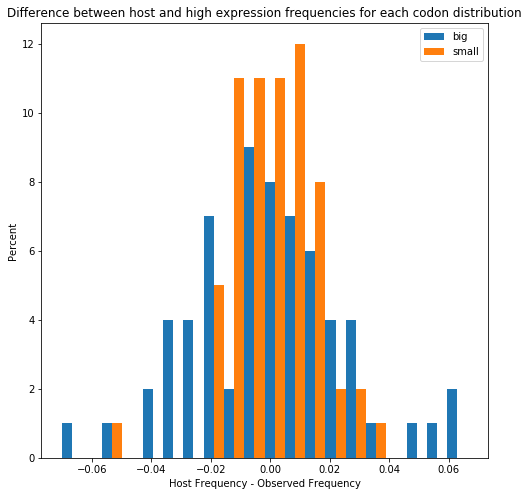

In [26]:
plt.figure(figsize = (8,8))
plt.hist([codons_table_big['Host Frequency - Observed Frequency'], 
          codons_table_small['Host Frequency - Observed Frequency']],
         bins = 20,
         label = ['big', 'small'], 
         rwidth = 1)
plt.legend()
plt.xlabel('Host Frequency - Observed Frequency')
plt.ylabel('Percent')
plt.title('Difference between host and high expression frequencies for each codon distribution')

Text(0.5, 1.0, 'Difference between host and other species')

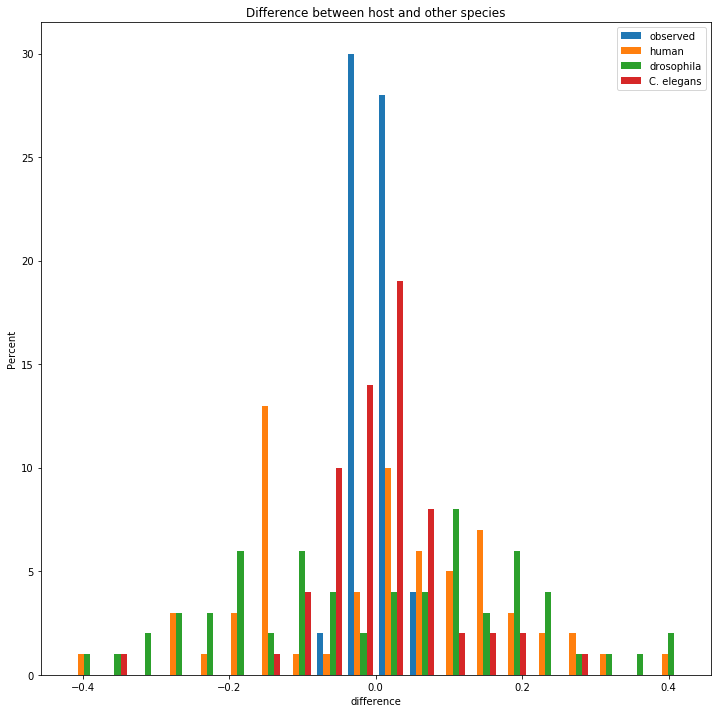

In [27]:
plt.figure(figsize = (12,12))
plt.hist([codons_table_big['Host Frequency - Observed Frequency'], 
          codons_table_big['Host Frequency - Human Frequency'],
          codons_table_big['Host Frequency - Drosophila Frequency'],
          codons_table_big['Host Frequency - C. Elegans']], 
         bins = 20, 
         label = ['observed', 'human', 'drosophila', 'C. elegans'])
plt.legend()
plt.xlabel('difference')
plt.ylabel('Percent')
plt.title('Difference between host and other species')

Text(0.5, 1.0, 'Difference between host and other species')

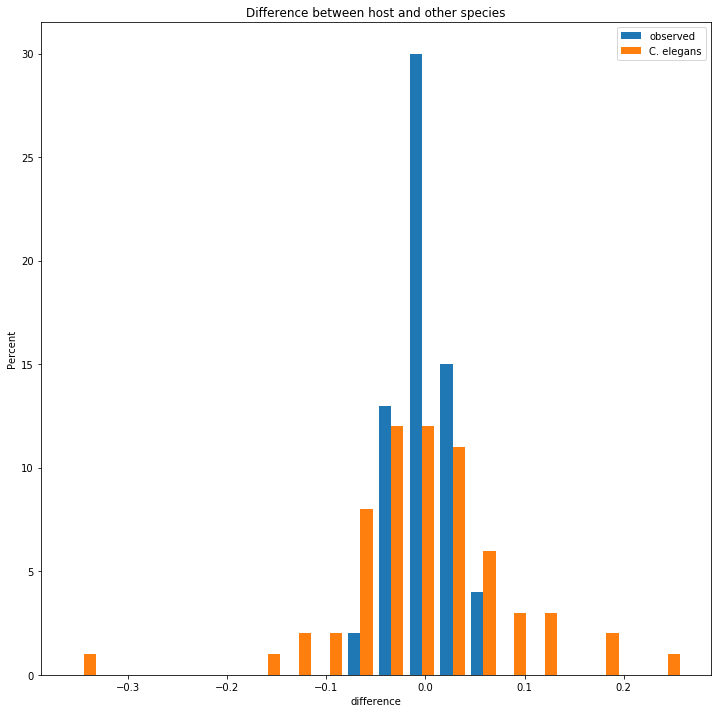

In [28]:
plt.figure(figsize = (12,12))
plt.hist([codons_table_big['Host Frequency - Observed Frequency'], 
          codons_table_big['Host Frequency - C. Elegans']], bins = 20, label = ['observed', 'C. elegans'])
plt.legend()
plt.xlabel('difference')
plt.ylabel('Percent')
plt.title('Difference between host and other species')

Text(0.5, 1.0, 'Difference between host and other species')

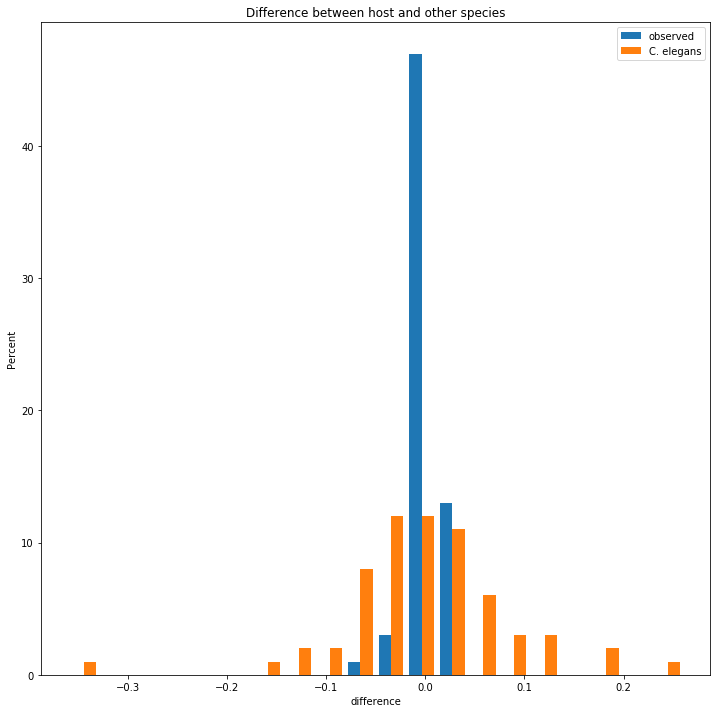

In [29]:
plt.figure(figsize = (12,12))
plt.hist([codons_table_small['Host Frequency - Observed Frequency'], 
          codons_table_small['Host Frequency - C. Elegans']], bins = 20, label = ['observed', 'C. elegans'])
plt.legend()
plt.xlabel('difference')
plt.ylabel('Percent')
plt.title('Difference between host and other species')

Text(0.5, 1.0, 'Difference between host and other species')

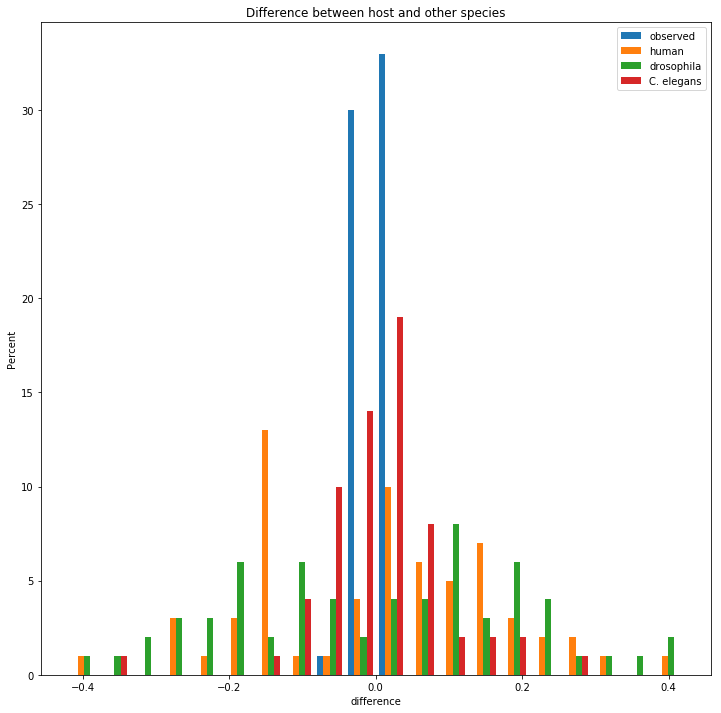

In [30]:
plt.figure(figsize = (12,12))
plt.hist([codons_table_small['Host Frequency - Observed Frequency'], 
          codons_table_small['Host Frequency - Human Frequency'],
          codons_table_small['Host Frequency - Drosophila Frequency'],
          codons_table_small['Host Frequency - C. Elegans']],
         bins = 20, 
         label = ['observed', 'human', 'drosophila', 'C. elegans'])
plt.legend()
plt.xlabel('difference')
plt.ylabel('Percent')
plt.title('Difference between host and other species')

Text(0.5, 1.0, 'Difference between host and high expression frequencies for each codon distribution')

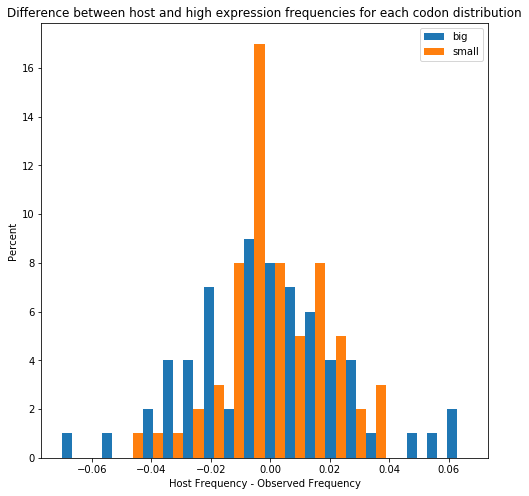

In [31]:
plt.figure(figsize = (8,8))
plt.hist([codons_table_big['Host Frequency - Observed Frequency'], 
          codons_small_sample_df['Host Frequency - Observed Frequency']], 
         bins = 20, 
         label = ['big', 'small'], 
         rwidth = 1)
plt.legend()
plt.xlabel('Host Frequency - Observed Frequency')
plt.ylabel('Percent')
plt.title('Difference between host and high expression frequencies for each codon distribution')

In [32]:
string = 'MISRTIGESIPPNTKHAVSVCLPTWEATVGYEEGESSIINSLTTGYPRFFIHKSIKKLCEILSAKYSMEDEACLCFPSYKVANRCREFIKVKTGLSTKVRILQLCTPKPMNQEEKLWRRECKITVVFVDQEIFPVMKQYWQHSGEIVSSRMAEYILHELQVKDNLKKMETVDNGKKFMTEDENRVNEEYIETRFGRNLNFLAADKAKYLIRKRIATKVVEKIDSEGLSDLFSFEHYNESNGPFNVGSGEALDDDQLNSDIPAETITSMGESGSNSTFENTATDDLKFHVNPNTDVYLFPSGMASIFTAHRLLLNFDAKRLSRSSSRQDKLIGYGPPFKKTVMFGFPYTDTLSILRKFNHTHFLGQGDSTSMNALKNILHSGEQILAVFIEAPSNPLLKMGDLQELKRLSDLYSFYIVVDETVGGFVNIDVLPYADIVCSSLTKIFSGDSNVIAGSLVLNPRGKIYEFARKFMKTEDGYEDCLWCEDALCLERNSRDFVERTIKVNTNTDILLKRVLLPQVGKLFKKIYYPSLTSEDTKRNYDSVMSTKDGGYGGLFSLTFFNIEEAKKFFNNLELCKGPSLGTNFTLACPYAIIAHYQELDEVAQYGVETNLVRVSVGLENSDVLCNVFQRAIEKALGE*'

Restriction sites to avoid

SgrAI

PacI 

SrfI

NheI

NdeI

SbfI 

Ase I 

BamHI

In [33]:
sgrai = 'CRCCGGYG'
paci = 'TTAATTAA'
srfi = 'GCCCGGGC'
nhei = 'GCTAGC'
ndei = 'CATATG'
sbfi = 'CCTGCAGG'
asei = 'ATTAAT'
bamhi = 'GGATCC'
restriction_list = [sgrai, paci, srfi, nhei, ndei, sbfi, asei, bamhi]

no_LSR = codons_table_big[(codons_table_big['Codon'] != 'CGC') &
                 (codons_table_big['Codon'] != 'CGA') &
                 (codons_table_big['Codon'] != 'CTC') & 
                 (codons_table_big['Codon'] != 'CTG') & 
                 (codons_table_big['Codon'] != 'AGC') & 
                 (codons_table_big['Codon'] != 'TCG')]
no_LSR.loc[(no_LSR['Amino Acid'] == 'L') & 
           (no_LSR['Codon'] != 'total'), 
           'Observed Frequency'] = no_LSR[(no_LSR['Amino Acid'] == 'L') & 
                                          (no_LSR['Codon'] != 'total')]['Observed Frequency'] / sum(no_LSR[(no_LSR['Amino Acid'] == 'L') & 
                                                                                                           (no_LSR['Codon'] != 'total')]['Observed Frequency'])
no_LSR.loc[(no_LSR['Amino Acid'] == 'R') & 
           (no_LSR['Codon'] != 'total'), 
           'Observed Frequency'] = no_LSR[(no_LSR['Amino Acid'] == 'R') & 
                                          (no_LSR['Codon'] != 'total')]['Observed Frequency'] / sum(no_LSR[(no_LSR['Amino Acid'] == 'R') & 
                                                                                                           (no_LSR['Codon'] != 'total')]['Observed Frequency'])
no_LSR.loc[(no_LSR['Amino Acid'] == 'S') & 
           (no_LSR['Codon'] != 'total'), 
           'Observed Frequency'] = no_LSR[(no_LSR['Amino Acid'] == 'S') & 
                                          (no_LSR['Codon'] != 'total')]['Observed Frequency'] / sum(no_LSR[(no_LSR['Amino Acid'] == 'S') & 
                                                                                                           (no_LSR['Codon'] != 'total')]['Observed Frequency'])

def open_fasta_file(name_of_file):
    #opens fasta file and extracts the sequence as a string
    for seq_record in SeqIO.parse(name_of_file, "fasta"):
        string = str(seq_record.seq)
    return string
        
def protein_to_seq(protein, CUT):
    #Generates potential sequences from a protein sequence and codon usage table
    seq = ''
    for elem in protein:
        AA = CUT[(CUT['Amino Acid'] == elem) & (CUT['Codon'] != 'total')]
        codon = AA.sample(n=1, weights = 'Observed Frequency')
        codon_str = codon['Codon'].to_string(index = False).strip()
        seq += codon_str
    return seq

def has_restriction_site(DNA, restriction_site):
    if restriction_site in DNA:
        return True
    return False

def generate_sequences(number, protein, CUT, list_of_restriction_sites):
    #Generates potential sequences from a protein sequence and codon usage table and verifies that none of the restriction enzymes cut
    #loops until the number of protein sequences have been generated
    successful_seq = 0
    sequences = []
    while successful_seq < number:
        potential_seq = protein_to_seq(protein, CUT)
        has_site = 0
        for restriction_enzyme in list_of_restriction_sites:
            if has_restriction_site(potential_seq, restriction_enzyme):
                has_site = 1
        if has_site == 0:
            sequences.append(potential_seq)
            successful_seq +=1
    return sequences

def add_tails_and_format(list_of_sequences, protein_name):
    five_head = 'TTAATTAATTTCCACCAACAATTTATCTCAATAAACA'
    three_head = 'CCTGCAGGATCCTCAT'
    finals = []
    sequence_num = 1
    for seq in list_of_sequences:
        record = SeqRecord(Seq(five_head + seq + three_head), 
                           id = ('id' + str(sequence_num)),
                           name = ('optimized sequence ' + str(sequence_num)),
                           description = ('codon optimized sequences of ' + protein_name)) 
        sequence_num += 1
        finals.append(record)
    return finals

/Users/eddiefung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
#human_AVPR2 = generate_sequences(40, open_fasta_file('human AVPR2.fasta'), no_LSR, restriction_list)
#human_AVPR2_plustails = add_tails_and_format(human_AVPR2, 'AVPR2')
#SeqIO.write(human_AVPR2_plustails, 'human avpr2 codon optimized.fasta', 'fasta')

In [53]:
for seq in SeqIO.parse('human avpr2 codon optimized.fasta', "fasta"):
    print(seq.id)

id1
id2
id3
id4
id5
id6
id7
id8
id9
id10
id11
id12
id13
id14
id15
id16
id17
id18
id19
id20
id21
id22
id23
id24
id25
id26
id27
id28
id29
id30
id31
id32
id33
id34
id35
id36
id37
id38
id39
id40


In [51]:
def select_sequences(file_name, list_of_ids):
    chosen_sequences = []
    for seq in SeqIO.parse(file_name, "fasta"):
        if seq.id in list_of_ids:
            chosen_sequences.append(seq)
    return chosen_sequences

In [106]:
avpr2 = select_sequences('human avpr2 codon optimized.fasta', ['id16', 'id22', 'id19', 'id25','id11', 'id18', 'id1', 'id7', 'id3', 'id39', 'id26', 'id20', 'id8'])
avpr2
#SeqIO.write(avpr2, 'human avpr2 chosen codon optimized.fasta', 'fasta')

[SeqRecord(seq=Seq('TTAATTAATTTCCACCAACAATTTATCTCAATAAACAATGTTAATGGCTTCAAC...CAT', SingleLetterAlphabet()), id='id1', name='id1', description='id1 codon optimized sequences of AVPR2', dbxrefs=[]),
 SeqRecord(seq=Seq('TTAATTAATTTCCACCAACAATTTATCTCAATAAACAATGCTTATGGCAAGTAC...CAT', SingleLetterAlphabet()), id='id3', name='id3', description='id3 codon optimized sequences of AVPR2', dbxrefs=[]),
 SeqRecord(seq=Seq('TTAATTAATTTCCACCAACAATTTATCTCAATAAACAATGTTGATGGCCTCTAC...CAT', SingleLetterAlphabet()), id='id7', name='id7', description='id7 codon optimized sequences of AVPR2', dbxrefs=[]),
 SeqRecord(seq=Seq('TTAATTAATTTCCACCAACAATTTATCTCAATAAACAATGTTAATGGCTTCCAC...CAT', SingleLetterAlphabet()), id='id8', name='id8', description='id8 codon optimized sequences of AVPR2', dbxrefs=[]),
 SeqRecord(seq=Seq('TTAATTAATTTCCACCAACAATTTATCTCAATAAACAATGTTGATGGCTAGTAC...CAT', SingleLetterAlphabet()), id='id11', name='id11', description='id11 codon optimized sequences of AVPR2', dbxrefs=[]),
 SeqRecord(s

In [114]:
for seq in avpr2:
    seq_string = str(seq.seq)
    corrected_string = seq_string.replace('CCTGCAGGATCCTCAT', 'tgacctgcaggcactcatgtaattagttatgtcacgcttacattcacg')
    print(len(corrected_string))
    seq.seq = Seq(corrected_string)
    seq.description = 'corrected tailed codon optimized sequences of AVPR2'


    
SeqIO.write(avpr2, 'human avpr2 correct tails.fasta', 'fasta')

1198
1198
1198
1198
1198
1198
1198
1198
1198
1198
1198
1198
1198


13

In [115]:
for seq in q129:
    seq_string = str(seq.seq)
    print(len(seq_string))
    corrected_string = seq_string.replace('CCTGCAGGATCCTCAT', 'tgacctgcaggcactcatgtaattagttatgtcacgcttacattcacg')
    print(len(corrected_string))
    seq.seq = Seq(corrected_string)
    seq.description = 'corrected tailed codon optimized sequences of CYSLTR2-CAM'
    
    
SeqIO.write(q129, 'CYSLTR2-CAM correct tails.fasta', 'fasta')

1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123


13

In [116]:
for seq in SSTR2:
    seq_string = str(seq.seq)
    corrected_string = seq_string.replace('CCTGCAGGATCCTCAT', 'tgacctgcaggcactcatgtaattagttatgtcacgcttacattcacg')
    print(len(corrected_string))
    seq.seq = Seq(corrected_string)
    seq.description = 'corrected tailed codon optimized sequences of SSTR2'


SeqIO.write(SSTR2, 'human SSTR2 correct tails', 'fasta')

1192
1192
1192
1192
1192
1192
1192
1192
1192
1192
1192
1192
1192


13

In [35]:
#human_l29Q = generate_sequences(40, open_fasta_file('human L129Q CYSLTR2.fasta'), no_LSR, restriction_list)
#human_l29Q_plustails = add_tails_and_format(human_l29Q, '129Q')
#SeqIO.write(human_l29Q_plustails, 'human_l29Q codon optimized.fasta', 'fasta')

In [56]:
q129 = select_sequences('human_l29Q codon optimized.fasta', ['id2', 'id39', 'id21', 'id13','id34', 'id22', 'id33', 'id18', 'id29', 'id7', 'id37', 'id5', 'id16'])
#SeqIO.write(q129, 'human_l29Q chosen codon optimized.fasta', 'fasta')

13

In [36]:
#human_N119A = generate_sequences(40, open_fasta_file('human N119A (S346A) CXCR4 CAM.fasta'), no_LSR, restriction_list)
#human_N119A_plustails = add_tails_and_format(human_N119A, 'N119A')
#SeqIO.write(human_N119A_plustails, 'human_N119A codon optimized.fasta', 'fasta')

In [57]:
#N119A = select_sequences('human_N119A codon optimized.fasta', ['id13', 'id32', 'id21', 'id4','id28', 'id9', 'id16', 'id27', 'id11', 'id22', 'id7', 'id36', 'id40'])
#SeqIO.write(N119A, 'human_N119A chosen codon optimized.fasta', 'fasta')

13

In [112]:
for seq in N119A:
    seq_string = str(seq.seq)
    print(len(seq_string))
    corrected_string = seq_string.replace('CCTGCAGGATCCTCAT', 'tgacctgcaggcactcatgtaattagttatgtcacgcttacattcacg')
    print(len(corrected_string))
    #seq.seq = Seq(corrected_string)

1106
1138
1106
1138
1106
1138
1106
1138
1106
1138
1106
1138
1106
1138
1106
1138
1106
1138
1106
1138
1106
1138
1106
1138
1106
1138


In [37]:
#human_SSTR2 = generate_sequences(40, open_fasta_file('human SSTR2.fasta'), no_LSR, restriction_list)
#human_SSTR2_plustails = add_tails_and_format(human_SSTR2, 'SSTR2')
#SeqIO.write(human_SSTR2_plustails, 'human_SSTR2 codon optimized.fasta', 'fasta')

In [59]:
SSTR2 = select_sequences('human_SSTR2 codon optimized.fasta', ['id18', 'id20', 'id33', 'id23','id16', 'id4', 'id9', 'id32', 'id30', 'id14', 'id7', 'id38', 'id6'])
#SeqIO.write(SSTR2, 'human_SSTR2 chosen codon optimized.fasta', 'fasta')

13

In [38]:
for restriction_enzyme in restriction_list:
    if has_restriction_site(human_l29Q_plustails[0], restriction_enzyme):
        print('restrict!'), print(restriction_enzyme)

NameError: name 'human_l29Q_plustails' is not defined

In [ ]:
#codons_table_big.to_csv('codon_high.csv')

In [70]:
def next_position(sequence):
    return sequence[0:3], sequence[3::]

def position_counts(list_of_proteins, codon_table):
    position_dict = {}
    DNA_sequences = []
    curr_DNA_sequence = 0
    high_codons = codon_table[codon_table.groupby(['Amino Acid'])['Host Frequency'].transform(max) == codon_table['Host Frequency']]['Codon'].to_list()
    for sgdid in list_of_proteins:
        sequence = get_reference(sgdid).get('residues')
        DNA_sequences.append(sequence)
    smallest_sequence = min([(len(i) // 3) for i in DNA_sequences])
    for i in range(1, ((smallest_sequence) + 1)):
        position_dict[i] = {}
        position_dict[i]['high'] = 0
        position_dict[i]['not high'] = 0
    for DNA_sequence in DNA_sequences:
        position = 0
        curr_DNA_sequence += 1
        for i in range(smallest_sequence):
            codon, DNA_sequence = next_position(DNA_sequence)
            position += 1
            if codon in high_codons:
                position_dict[position]['high'] += 1
            else:
                position_dict[position]['not high'] += 1
    for i in range(1, position+1):
        position_dict[i]['high'] = position_dict[i]['high'] / (curr_DNA_sequence)
        position_dict[i]['not high'] = position_dict[i]['not high'] / (curr_DNA_sequence)
    return position_dict

def position_counts_v2(list_of_proteins, codon_table):
    position_dict = {}
    DNA_sequences = []
    curr_DNA_sequence = 0
    for sgdid in list_of_proteins:
        sequence = get_reference(sgdid).get('residues')
        DNA_sequences.append(sequence)
    for i in range(1, 101):
        position_dict[i] = 0
    for DNA_sequence in DNA_sequences:
        position = 0
        curr_DNA_sequence += 1
        for i in range(100):
            codon, DNA_sequence = next_position(DNA_sequence)
            position += 1
            position_dict[position] += codon_table[codon_table['Codon'] == codon]['Host Frequency'].to_list()[0]
    for i in range(1, position+1):
        position_dict[i] = position_dict[i] / (curr_DNA_sequence)
    return position_dict

def plot_counts(dictionary, labels):
    positions = []
    frequency = []
    for keys, values in dictionary.items():
        positions.append(keys)
        frequency.append(values)
    plt.figure(figsize = (15,15))
    plt.bar(positions, frequency, label = labels)
    plt.legend()

In [92]:
big_exp_list = get_protein_list(expression = [3, 4], amino_acid_range = (200, 2000))['SGD ID'].tolist()
small_exp_list = get_protein_list(expression = [1, 2], amino_acid_range = (200, 2000))['SGD ID'].tolist()
small_exp_random = get_protein_list(expression = [1, 2], amino_acid_range = (200, 2000)).sample(len(big_exp_list))['SGD ID'].tolist()

In [41]:
len(get_reference('YKL083W').get('residues'))

615

In [93]:
#large = position_counts_v2(big_exp_list, codons_table_big)
small = position_counts_v2(small_exp_random, codons_table_small)

In [45]:
for seq in SeqIO.parse('human avpr2 codon optimized.fasta', "fasta"):
    print(seq)

ID: id1
Name: id1
Description: id1 codon optimized sequences of AVPR2
Number of features: 0
Seq('TTAATTAATTTCCACCAACAATTTATCTCAATAAACAATGTTAATGGCTTCAAC...CAT', SingleLetterAlphabet())
ID: id2
Name: id2
Description: id2 codon optimized sequences of AVPR2
Number of features: 0
Seq('TTAATTAATTTCCACCAACAATTTATCTCAATAAACAATGTTAATGGCGTCTAC...CAT', SingleLetterAlphabet())
ID: id3
Name: id3
Description: id3 codon optimized sequences of AVPR2
Number of features: 0
Seq('TTAATTAATTTCCACCAACAATTTATCTCAATAAACAATGCTTATGGCAAGTAC...CAT', SingleLetterAlphabet())
ID: id4
Name: id4
Description: id4 codon optimized sequences of AVPR2
Number of features: 0
Seq('TTAATTAATTTCCACCAACAATTTATCTCAATAAACAATGTTGATGGCGTCAAC...CAT', SingleLetterAlphabet())
ID: id5
Name: id5
Description: id5 codon optimized sequences of AVPR2
Number of features: 0
Seq('TTAATTAATTTCCACCAACAATTTATCTCAATAAACAATGCTTATGGCTTCCAC...CAT', SingleLetterAlphabet())
ID: id6
Name: id6
Description: id6 codon optimized sequences of AVPR2
Number of 

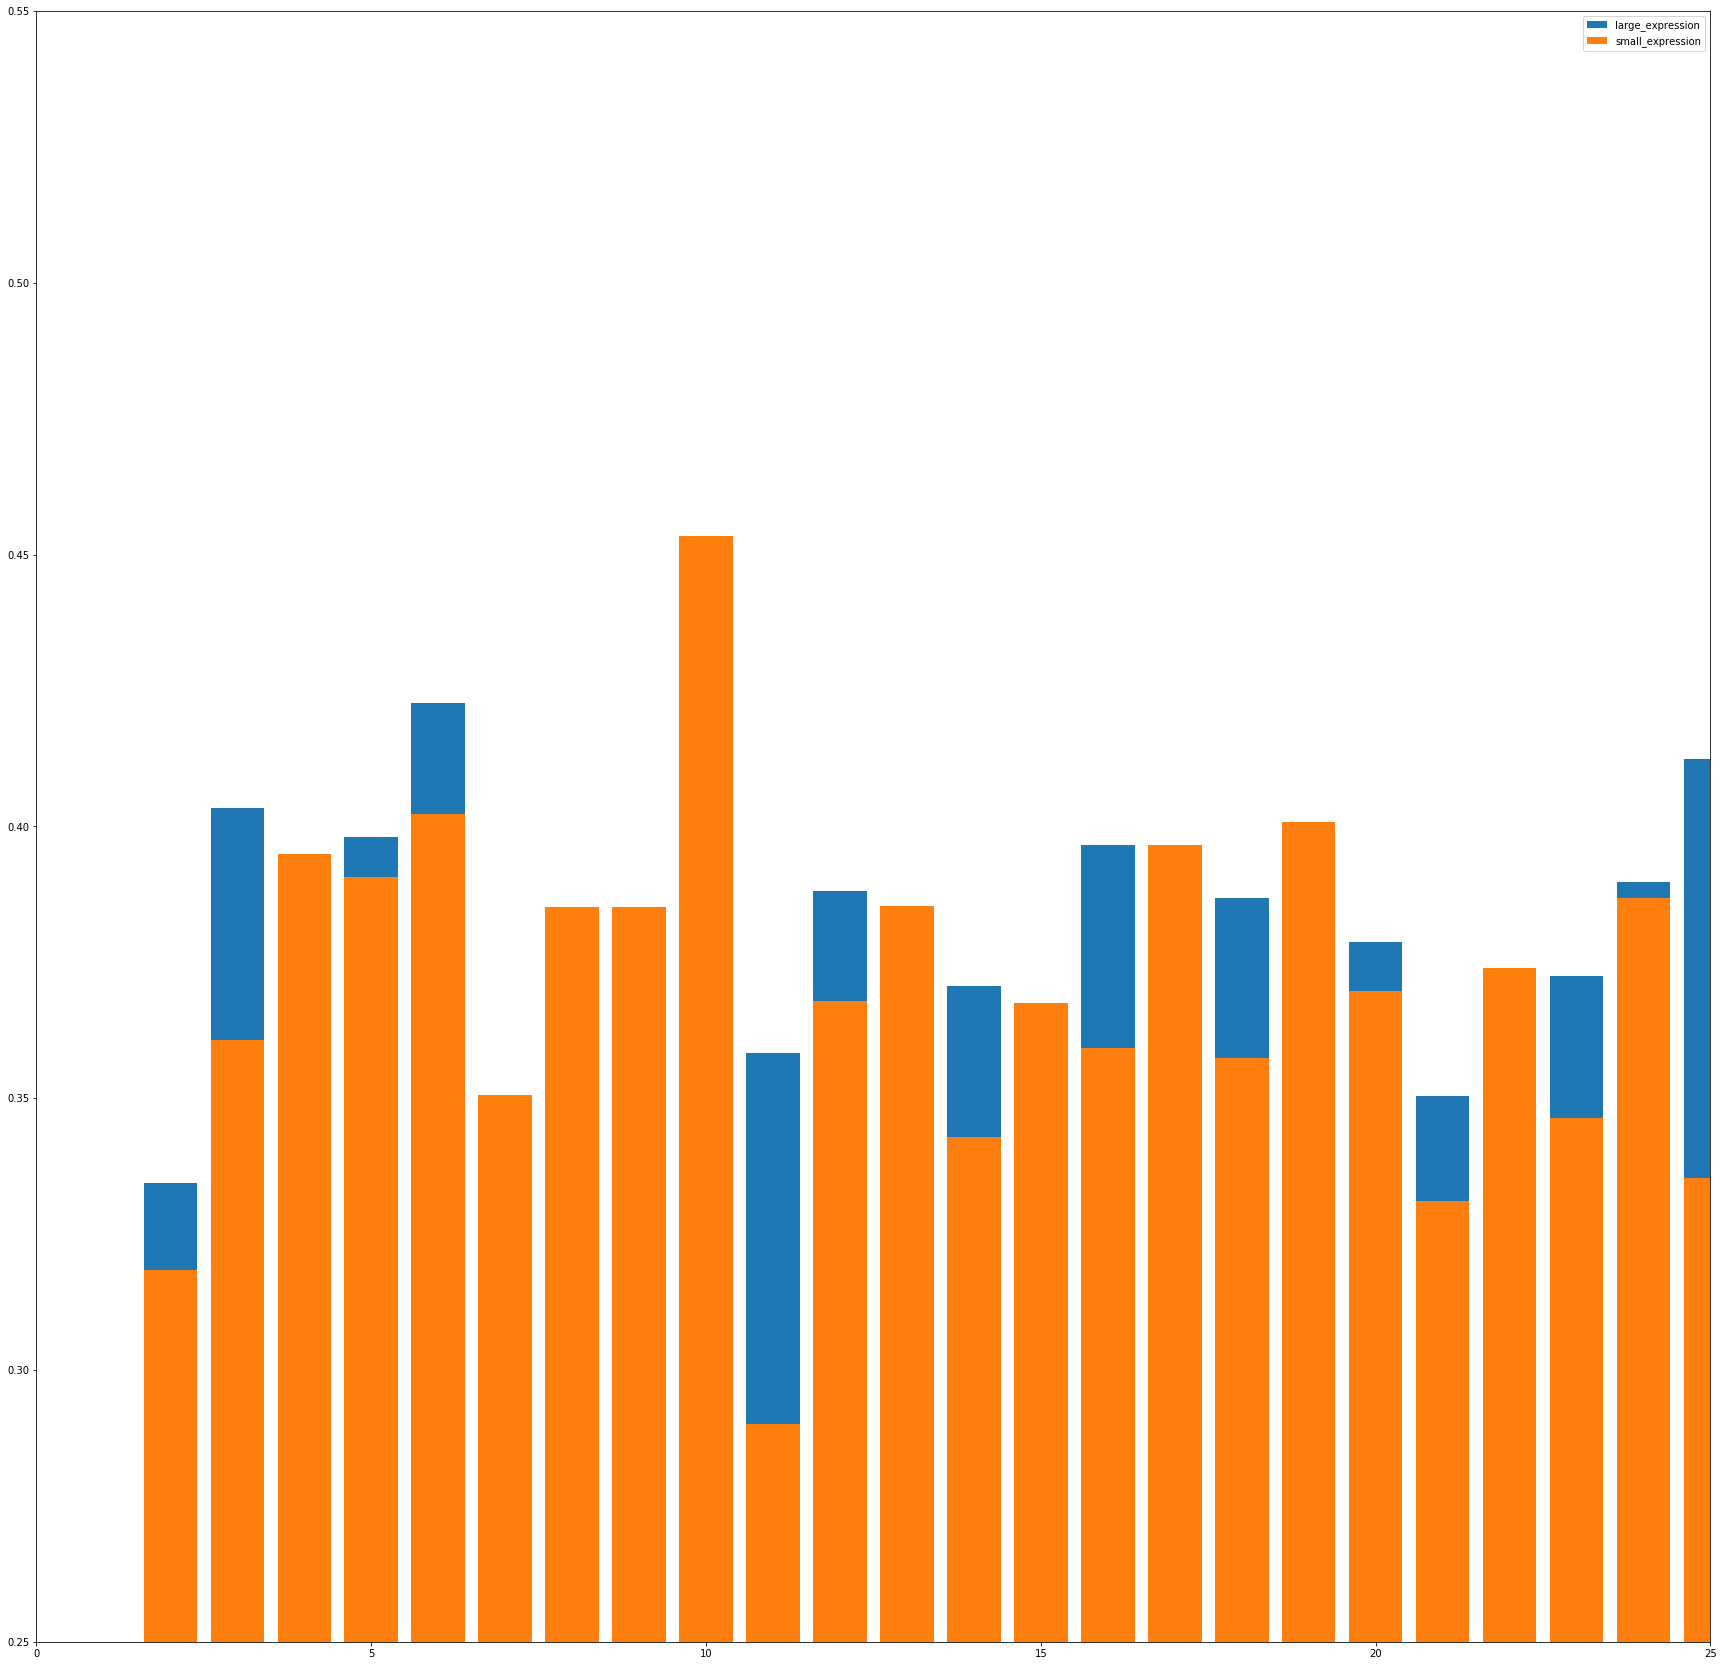

In [127]:
positions_large = []
frequency_large = []
for keys_large, values_large in large.items():
    positions_large.append(keys_large)
    frequency_large.append(values_large)
positions_small = []
frequency_small = []
for keys_small, values_small in small.items():
    positions_small.append(keys_small)
    frequency_small.append(values_small)
    
plt.figure(figsize = (30,30))
plt.bar([(x) for x in positions_large[1::]] , frequency_large[1::], label = 'large_expression')
plt.bar(positions_small[1::], frequency_small[1::], label = 'small_expression')
plt.ylim((.25, .55))
plt.xlim((0,25))
plt.legend()

In [67]:
positions

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [68]:
frequency

[1.0,
 0.334406779661017,
 0.40338983050847477,
 0.3889830508474577,
 0.3979661016949154,
 0.4227118644067795,
 0.32813559322033903,
 0.3142372881355932,
 0.3035593220338985,
 0.37813559322033913,
 0.3583050847457629,
 0.38813559322033914,
 0.3616949152542373,
 0.37067796610169507,
 0.28949152542372897,
 0.39661016949152567,
 0.36033898305084766,
 0.3867796610169492,
 0.3647457627118645,
 0.37881355932203403,
 0.3503389830508475,
 0.3483050847457628,
 0.37254237288135594,
 0.3898305084745764,
 0.41237288135593225,
 0.3920338983050847,
 0.38084745762711864,
 0.34644067796610184,
 0.46508474576271175,
 0.3928813559322036,
 0.4108474576271188,
 0.3347457627118644,
 0.4042372881355932,
 0.41288135593220343,
 0.3615254237288136,
 0.45966101694915257,
 0.3633898305084747,
 0.4155932203389832,
 0.376271186440678,
 0.3955932203389831,
 0.40830508474576277,
 0.505084745762712,
 0.3371186440677966,
 0.3679661016949152,
 0.41830508474576283,
 0.3903389830508474,
 0.43220338983050854,
 0.364576271